In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D
from keras.optimizers import RMSprop, Adam
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [2]:
df=pd.read_csv('train.csv')

In [3]:
test=pd.read_csv('test.csv')

In [4]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
y=df.label
x=df.drop('label',axis=1)

In [6]:
x=x/255.0
x=x.values.reshape(-1,28,28,1)
y=np.array(y)
y=to_categorical(y,num_classes=10)

In [7]:
x.shape,y.shape

((42000, 28, 28, 1), (42000, 10))

In [8]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

In [9]:
print(type(xtrain),type(xtest),type(ytrain),type(ytest))

<class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'> <class 'numpy.ndarray'>


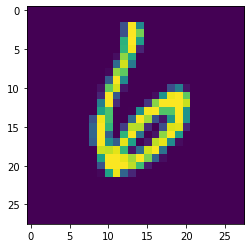

In [10]:
plt.imshow((xtrain[0][:,:,0]))

In [11]:
# model building

In [12]:

def create_model():
    model = Sequential()
    # The first two layers with 32 filters of window size 3x3
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [13]:
model=create_model()
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(xtrain, ytrain, batch_size=256, epochs=500, verbose=1, validation_data=(xtest, ytest))
model.evaluate(xtest, ytest)

Train on 33600 samples, validate on 8400 samples
Epoch 1/500
33600/33600 [==============================] - 110s 3ms/step - loss: 0.8162 - accuracy: 0.7293 - val_loss: 0.2304 - val_accuracy: 0.9231
Epoch 2/500
33600/33600 [==============================] - 117s 3ms/step - loss: 0.1914 - accuracy: 0.9435 - val_loss: 0.0912 - val_accuracy: 0.9725
Epoch 3/500
33600/33600 [==============================] - 115s 3ms/step - loss: 0.1181 - accuracy: 0.9655 - val_loss: 0.0605 - val_accuracy: 0.9812
Epoch 4/500
33600/33600 [==============================] - 112s 3ms/step - loss: 0.0875 - accuracy: 0.9755 - val_loss: 0.0712 - val_accuracy: 0.9788
Epoch 5/500
33600/33600 [==============================] - 100s 3ms/step - loss: 0.0716 - accuracy: 0.9800 - val_loss: 0.0515 - val_accuracy: 0.9860
Epoch 6/500
33600/33600 [==============================] - 103s 3ms/step - loss: 0.0626 - accuracy: 0.9823 - val_loss: 0.0458 - val_accuracy: 0.9869
Epoch 7/500
33600/33600 [==============================] 

33600/33600 [==============================] - 101s 3ms/step - loss: 0.0131 - accuracy: 0.9968 - val_loss: 0.0445 - val_accuracy: 0.9937
Epoch 56/500
33600/33600 [==============================] - 101s 3ms/step - loss: 0.0120 - accuracy: 0.9970 - val_loss: 0.0335 - val_accuracy: 0.9939
Epoch 57/500
33600/33600 [==============================] - 100s 3ms/step - loss: 0.0110 - accuracy: 0.9968 - val_loss: 0.0419 - val_accuracy: 0.9935
Epoch 58/500
33600/33600 [==============================] - 101s 3ms/step - loss: 0.0114 - accuracy: 0.9971 - val_loss: 0.0345 - val_accuracy: 0.9939
Epoch 59/500
33600/33600 [==============================] - 100s 3ms/step - loss: 0.0131 - accuracy: 0.9969 - val_loss: 0.0623 - val_accuracy: 0.9890
Epoch 60/500
33600/33600 [==============================] - 99s 3ms/step - loss: 0.0136 - accuracy: 0.9970 - val_loss: 0.0512 - val_accuracy: 0.9932
Epoch 61/500
33600/33600 [==============================] - 100s 3ms/step - loss: 0.0142 - accuracy: 0.9971 - val_

33600/33600 [==============================] - 100s 3ms/step - loss: 0.0180 - accuracy: 0.9963 - val_loss: 0.0480 - val_accuracy: 0.9931
Epoch 110/500
33600/33600 [==============================] - 101s 3ms/step - loss: 0.0204 - accuracy: 0.9961 - val_loss: 0.0357 - val_accuracy: 0.9943
Epoch 111/500
33600/33600 [==============================] - 101s 3ms/step - loss: 0.0187 - accuracy: 0.9963 - val_loss: 0.0601 - val_accuracy: 0.9939
Epoch 112/500
33600/33600 [==============================] - 100s 3ms/step - loss: 0.0199 - accuracy: 0.9957 - val_loss: 0.0489 - val_accuracy: 0.9931
Epoch 113/500
33600/33600 [==============================] - 100s 3ms/step - loss: 0.0184 - accuracy: 0.9968 - val_loss: 0.0697 - val_accuracy: 0.9923
Epoch 114/500
33600/33600 [==============================] - 100s 3ms/step - loss: 0.0148 - accuracy: 0.9967 - val_loss: 0.0413 - val_accuracy: 0.9939
Epoch 115/500
33600/33600 [==============================] - 104s 3ms/step - loss: 0.0205 - accuracy: 0.9961

33600/33600 [==============================] - 102s 3ms/step - loss: 0.0237 - accuracy: 0.9957 - val_loss: 0.0610 - val_accuracy: 0.9931
Epoch 164/500
33600/33600 [==============================] - 101s 3ms/step - loss: 0.0205 - accuracy: 0.9956 - val_loss: 0.0453 - val_accuracy: 0.9918
Epoch 165/500
33600/33600 [==============================] - 101s 3ms/step - loss: 0.0207 - accuracy: 0.9959 - val_loss: 0.0996 - val_accuracy: 0.9911
Epoch 166/500
33600/33600 [==============================] - 101s 3ms/step - loss: 0.0236 - accuracy: 0.9964 - val_loss: 0.0366 - val_accuracy: 0.9940
Epoch 167/500
33600/33600 [==============================] - 101s 3ms/step - loss: 0.0197 - accuracy: 0.9960 - val_loss: 0.0906 - val_accuracy: 0.9929
Epoch 168/500
33600/33600 [==============================] - 100s 3ms/step - loss: 0.0215 - accuracy: 0.9964 - val_loss: 0.0684 - val_accuracy: 0.9936
Epoch 169/500
33600/33600 [==============================] - 100s 3ms/step - loss: 0.0276 - accuracy: 0.9963

33600/33600 [==============================] - 103s 3ms/step - loss: 0.0378 - accuracy: 0.9954 - val_loss: 0.0472 - val_accuracy: 0.9892
Epoch 218/500
33600/33600 [==============================] - 103s 3ms/step - loss: 0.0281 - accuracy: 0.9949 - val_loss: 0.0533 - val_accuracy: 0.9932
Epoch 219/500
33600/33600 [==============================] - 103s 3ms/step - loss: 0.0240 - accuracy: 0.9963 - val_loss: 0.0825 - val_accuracy: 0.9938
Epoch 220/500
33600/33600 [==============================] - 102s 3ms/step - loss: 0.0223 - accuracy: 0.9960 - val_loss: 0.1707 - val_accuracy: 0.9940
Epoch 221/500
33600/33600 [==============================] - 103s 3ms/step - loss: 0.0399 - accuracy: 0.9946 - val_loss: 0.0646 - val_accuracy: 0.9930
Epoch 222/500
33600/33600 [==============================] - 102s 3ms/step - loss: 0.0263 - accuracy: 0.9961 - val_loss: 0.0643 - val_accuracy: 0.9925
Epoch 223/500
33600/33600 [==============================] - 102s 3ms/step - loss: 0.0296 - accuracy: 0.9960

33600/33600 [==============================] - 102s 3ms/step - loss: 0.0319 - accuracy: 0.9960 - val_loss: 0.0639 - val_accuracy: 0.9906
Epoch 272/500
33600/33600 [==============================] - 103s 3ms/step - loss: 0.0238 - accuracy: 0.9955 - val_loss: 0.0819 - val_accuracy: 0.9933
Epoch 273/500
33600/33600 [==============================] - 103s 3ms/step - loss: 0.0291 - accuracy: 0.9954 - val_loss: 0.0613 - val_accuracy: 0.9925
Epoch 274/500
33600/33600 [==============================] - 103s 3ms/step - loss: 0.0262 - accuracy: 0.9953 - val_loss: 0.0634 - val_accuracy: 0.9931
Epoch 275/500
33600/33600 [==============================] - 102s 3ms/step - loss: 0.0336 - accuracy: 0.9941 - val_loss: 0.1531 - val_accuracy: 0.9932
Epoch 276/500
33600/33600 [==============================] - 102s 3ms/step - loss: 0.0345 - accuracy: 0.9956 - val_loss: 0.0814 - val_accuracy: 0.9948
Epoch 277/500
33600/33600 [==============================] - 103s 3ms/step - loss: 0.0291 - accuracy: 0.9955

33600/33600 [==============================] - 102s 3ms/step - loss: 0.0290 - accuracy: 0.9960 - val_loss: 0.0908 - val_accuracy: 0.9929
Epoch 326/500
33600/33600 [==============================] - 106s 3ms/step - loss: 0.0434 - accuracy: 0.9942 - val_loss: 0.0643 - val_accuracy: 0.9911
Epoch 327/500
33600/33600 [==============================] - 103s 3ms/step - loss: 0.0358 - accuracy: 0.9954 - val_loss: 0.0799 - val_accuracy: 0.9925
Epoch 328/500
33600/33600 [==============================] - 102s 3ms/step - loss: 0.0425 - accuracy: 0.9947 - val_loss: 0.0458 - val_accuracy: 0.9912
Epoch 329/500
33600/33600 [==============================] - 104s 3ms/step - loss: 0.0411 - accuracy: 0.9932 - val_loss: 0.0476 - val_accuracy: 0.9925
Epoch 330/500
33600/33600 [==============================] - 103s 3ms/step - loss: 0.0358 - accuracy: 0.9947 - val_loss: 0.0499 - val_accuracy: 0.9937
Epoch 331/500
33600/33600 [==============================] - 103s 3ms/step - loss: 0.0413 - accuracy: 0.9945

33600/33600 [==============================] - 106s 3ms/step - loss: 0.0433 - accuracy: 0.9957 - val_loss: 0.1457 - val_accuracy: 0.9925
Epoch 380/500
33600/33600 [==============================] - 108s 3ms/step - loss: 0.0431 - accuracy: 0.9944 - val_loss: 0.0743 - val_accuracy: 0.9908
Epoch 381/500
33600/33600 [==============================] - 105s 3ms/step - loss: 0.0395 - accuracy: 0.9944 - val_loss: 0.0585 - val_accuracy: 0.9925
Epoch 382/500
33600/33600 [==============================] - 108s 3ms/step - loss: 0.0503 - accuracy: 0.9935 - val_loss: 0.0989 - val_accuracy: 0.9933
Epoch 383/500
33600/33600 [==============================] - 107s 3ms/step - loss: 0.0451 - accuracy: 0.9939 - val_loss: 0.0775 - val_accuracy: 0.9935
Epoch 384/500
33600/33600 [==============================] - 107s 3ms/step - loss: 0.0418 - accuracy: 0.9945 - val_loss: 0.0947 - val_accuracy: 0.9936
Epoch 385/500
33600/33600 [==============================] - 108s 3ms/step - loss: 0.0600 - accuracy: 0.9934

33600/33600 [==============================] - 111s 3ms/step - loss: 0.0360 - accuracy: 0.9934 - val_loss: 0.0758 - val_accuracy: 0.9900
Epoch 434/500
33600/33600 [==============================] - 120s 4ms/step - loss: 0.0627 - accuracy: 0.9932 - val_loss: 0.0731 - val_accuracy: 0.9921
Epoch 435/500
33600/33600 [==============================] - 116s 3ms/step - loss: 0.0533 - accuracy: 0.9948 - val_loss: 0.0616 - val_accuracy: 0.9902
Epoch 436/500
33600/33600 [==============================] - 110s 3ms/step - loss: 0.0668 - accuracy: 0.9930 - val_loss: 0.0738 - val_accuracy: 0.9932
Epoch 437/500
33600/33600 [==============================] - 109s 3ms/step - loss: 0.0454 - accuracy: 0.9945 - val_loss: 0.0653 - val_accuracy: 0.9917
Epoch 438/500
33600/33600 [==============================] - 110s 3ms/step - loss: 0.0453 - accuracy: 0.9941 - val_loss: 0.1089 - val_accuracy: 0.9940
Epoch 439/500
33600/33600 [==============================] - 107s 3ms/step - loss: 0.0539 - accuracy: 0.9925

33600/33600 [==============================] - 108s 3ms/step - loss: 0.0434 - accuracy: 0.9941 - val_loss: 0.1347 - val_accuracy: 0.9914
Epoch 488/500
33600/33600 [==============================] - 108s 3ms/step - loss: 0.0588 - accuracy: 0.9915 - val_loss: 0.1828 - val_accuracy: 0.9908
Epoch 489/500
33600/33600 [==============================] - 110s 3ms/step - loss: 0.0462 - accuracy: 0.9936 - val_loss: 0.2082 - val_accuracy: 0.9940
Epoch 490/500
33600/33600 [==============================] - 109s 3ms/step - loss: 0.0568 - accuracy: 0.9931 - val_loss: 0.2294 - val_accuracy: 0.9932
Epoch 491/500
33600/33600 [==============================] - 111s 3ms/step - loss: 0.0665 - accuracy: 0.9919 - val_loss: 0.1350 - val_accuracy: 0.9917
Epoch 492/500
33600/33600 [==============================] - 110s 3ms/step - loss: 0.0483 - accuracy: 0.9924 - val_loss: 0.1669 - val_accuracy: 0.9923
Epoch 493/500
33600/33600 [==============================] - 106s 3ms/step - loss: 0.0620 - accuracy: 0.9929

[0.1712227933988474, 0.9913095235824585]

In [14]:
print(history.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [17]:
import seaborn as sns

fig = plt.figure(figsize=(10, 10)) # Set Figure

pred = model.predict(xtest) # Predict encoded label as 2 => [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

pred = np.argmax(pred) # Decode Predicted labels
ytest = np.argmax(ytest) # Decode labels

mat = confusion_matrix(ytest, pred) # Confusion matrix

# Plot Confusion matrix
sns.heatmap(mat.T, square=True, annot=True, cbar=False, cmap=plt.cm.Blues)
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show()

TypeError: Singleton array 2 cannot be considered a valid collection.

<Figure size 720x720 with 0 Axes>